# CNN(Convolution Neural Network)
---
- 이미지, 영상 처리에 사용되는 신경망 모델
- DNN의 한 분야
- 텍스트 처리에도 사용되는 모델
- 사용되는 Layer
    * ConvXD : 이미지의 형태 그대로 입력 받아 특징을 추출하는 레이어
    * Polling : 특징맵에서 특징을 다시 추출, 다운샘플링하는 레이어, 크기 반으로 줄임

In [1]:
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.fashion_mnist import load_data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# W, b 고정하도록 seed 설정
set_random_seed(11)

## [1] 데이터 준비 및 로딩
---

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}, y_test.shape : {y_test.shape}')

x_train.shape : (60000, 28, 28), y_train.shape : (60000,)
x_test.shape : (10000, 28, 28), y_test.shape : (10000,)


## [2] 데이터 전처리 및 학습형태로 변환

In [5]:
# 스케일링 => 픽셀 / 255.0
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
# Conv 레이어는 이미지의 채널 정보까지 입력
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
print(f'x_train.shape : {x_train.shape}, x_test.shape : {x_test.shape}')

x_train.shape : (60000, 28, 28, 1), x_test.shape : (10000, 28, 28, 1)


In [8]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  stratify=y_train,
                                                  random_state=11)

In [10]:
print(f'x_train.shape : {x_train.shape}, \nx_val.shape : {x_val.shape}, \nx_test.shape : {x_test.shape}')

x_train.shape : (45000, 28, 28, 1), 
x_val.shape : (15000, 28, 28, 1), 
x_test.shape : (10000, 28, 28, 1)


## [3] 모델 구성 및 생성
---
- 입력 형태 : 채널정보까지 포함 3차원 (28, 28, 1)
- 출력 형태 : 0 ~ 9 정수 확률값 10개 출력
- 학습 방식 : 분류 - 다중분류
- 전반부
    * 이미지 특징 추출
        - Conv2D, MaxPoll2D
- 후반부
    * 이미지 데이터 학습
        - Flatten, Dense

### [3-1] 모델 구상

In [27]:
model = Sequential()

In [28]:
# 이미지 특징 추출 Layer => 첫번째 입력값 설정
model.add(Conv2D(10, kernel_size=3, padding='same', input_shape=(28,28,1)))

In [29]:
# 이미지 특징 다운샘플링 Layer => MaxPool2D
model.add(MaxPool2D())

In [31]:
# 한 세트 한번 더 돌려보고
model.add(Conv2D(10, kernel_size=3, padding='same'))
model.add(MaxPool2D())  

In [32]:
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [33]:
# 출력층 => Node : 10개(0~9), activation : softmax
model.add(Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 10)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 490)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [17]:
# 인풋도 볼 수 있즤
# plot_model(model, show_shapes=True, to_file='cnn.png')

### [3-2] 모델 생성
---
- compile 메서드
    * loss 손실 함수 => sparse_categorical_crossentropy
    * optimizer 최적화 방식 => adam
    * metrics 평가항목 => accuracy

In [35]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

### [3-3] 모델 학습
---
- fit 메서드
    * 학습 데이터, 라벨
    * epochs 학습횟수
    * batch_size 학습분량
    * validation_data (검증데이터, 검증라벨)
    * validatipn_split 학습데이터의 일부 비율 설정 (예:0.2)
    * callback
    * verbose : 학습 진행도 화면 출력 여부 설정

In [36]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5777 - accuracy: 0.7939
Epoch 2/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4024 - accuracy: 0.8578
Epoch 3/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3611 - accuracy: 0.8728
Epoch 4/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3368 - accuracy: 0.8819
Epoch 5/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3200 - accuracy: 0.8862
Epoch 6/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3052 - accuracy: 0.8937
Epoch 7/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2947 - accuracy: 0.8966
Epoch 8/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2865 - accuracy: 0.8971
Epoch 9/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2803 - accuracy: 0.9000
Epoch 10/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.274

### [4] 평가
---
- evaluate 메서드
- 테스트 데이터, 테스트 타겟

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3500 - accuracy: 0.8876


[0.3500331938266754, 0.8876000046730042]

### [5] 테스트
---
- 새로운 데이터 

In [22]:
# 테스트 값에서 하나 뽑아서
x_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [21]:
pre_y = model.predict(x_test[0].reshape(-1,28,28,1))

1/1 [==============================] - 0s 57ms/step


In [23]:
# 0-9 순서대로 나올 확률이 적힌 것인데, 9일 확률이 0.99로 가장 높음
pre_y.round(2), pre_y.shape

(array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99]],
       dtype=float32),
 (1, 10))

In [24]:
y_test[0]

9

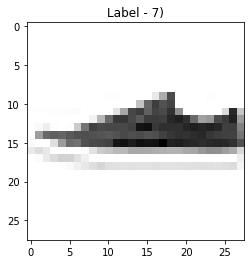

In [26]:
plt.imshow(x_val[0].reshape(28,28), cmap='gray_r')
plt.title(f'Label - {y_val[0]})')
plt.show()